**AQI:** The air quality index is an index for reporting air quality on a daily basis.

AQI Level	AQI Range
* Good	0 – 50
* Moderate	51 – 100
* Unhealthy	101 – 150
* Unhealthy for Strong People	151 – 200
* Hazardous	201+

Information on the dataset:

It contains 7 attributes, of which 6 are chemical pollution quantities and one is Air Quality Index. AQI Value, CO AQI Value, Ozone AQI Value, NO2 AQI Value, PM2.5 AQI Value, lat,LNG are independent attributes. air_quality_index is a dependent attribute. Since air_quality_index is calculated based on the 7 attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/AQI-and-Lat-Long-of-Countries.csv")
df.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [3]:
df.shape

(16695, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


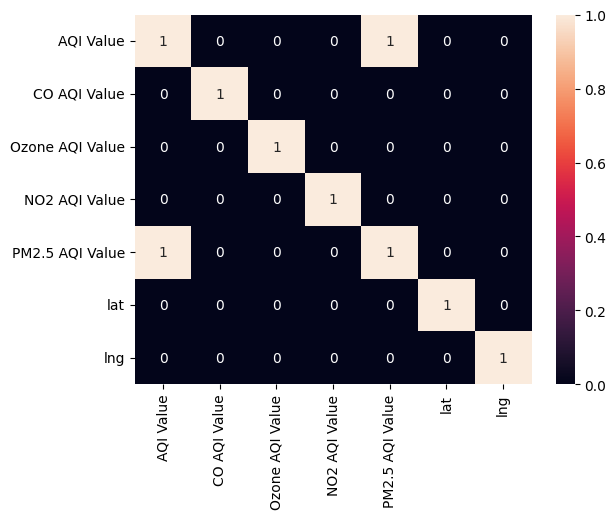

In [10]:
#Checking for correlativity
sns.heatmap(df.corr()>0.8, annot=True)
plt.show()

We do have high correlativity between AQI value and PM2.5 AQI VAlue but since one of the column is a target variable we'll be avoiding removing it.

In [11]:
#checking for null values
df.isnull().sum()

,0
AQI Value,0
CO AQI Value,0
Ozone AQI Value,0
NO2 AQI Value,0
PM2.5 AQI Value,0
lat,0
lng,0


luckily we don't have any null values.

In [12]:
# Feature extraction
x = df.drop(columns = 'AQI Value', axis=1)
y = df['AQI Value']
print(x,y)

       CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value      lat  \
0                 1               36              0               51  44.7444   
1                 1                5              1               41  -5.2900   
2                 1                5              1               41 -11.2958   
3                 1               39              2               66  37.1667   
4                 1               34              0               20  53.0167   
...             ...              ...            ...              ...      ...   
16690             1               34              5               54  37.5516   
16691             1               39              1               71  49.0650   
16692             1               39              1               71  36.3385   
16693             1               20              5               50  48.7786   
16694             1               44              2               71  40.1241   

           lng  
0      44.

In [13]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((15025, 6), (1670, 6), (15025,), (1670,))

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model

RandomForestRegressor()

In [29]:
print("Training score of RFR : ", model.score( x_train, y_train,))
print("Testing score of RFR : ", model.score(x_test,y_test))

Training score of RFR :  0.9997574544869705
Testing score of RFR :  0.9994181377644723


In [18]:
from sklearn.metrics import r2_score

print("Training r squared score of RFR : ", r2_score(y_train, model.predict(x_train)))
print("Testing r squared score of RFR : ", r2_score(y_test, model.predict(x_test)))

Training r squared score of RFR :  0.9997574544869705
Testing r squared score of RFR :  0.9994181377644723


We can see from score and r2_score our model is performing excellently with training and testing data both.

In [27]:
#Let's create AdaBoostRegressor model now

from sklearn.ensemble import AdaBoostRegressor

adar = AdaBoostRegressor()
adar.fit(x_train, y_train)
adar

AdaBoostRegressor()

In [31]:
print("Training score of ADAR : ", adar.score( x_train, y_train))
print("Testing score of ADAR : ", adar.score(x_test, y_test))

Training score of ADAR :  0.9422465365349911
Testing score of ADAR :  0.9488136678584426


In [33]:
print("Training r squared score of ADAR : ", r2_score(adar.predict(x_train), y_train,))
print("Testing r squared score of ADAR : ", r2_score(adar.predict(x_test), y_test))

Training r squared score of ADAR :  0.9380545924296855
Testing r squared score of ADAR :  0.9446692264245715


Here also we can see that the model is performing good.

From the above scores we can conclude that Random Forest is performing better than AdaBoostRegressor

Like always thank you so much for going through my work till the end.
Feel free to get in touch if you have any questions... :)